In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark') # change to darkgrid for grid
plt.style.use('dark_background')
plt.figure(figsize=(400, 400))

<Figure size 40000x40000 with 0 Axes>

<Figure size 40000x40000 with 0 Axes>

In [2]:
!pip install -qU openpyxl
df = pd.read_excel("data.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 19 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   S. No.                                              810 non-null    int64 
 1   City                                                810 non-null    object
 2   Gender                                              810 non-null    object
 3   Marital Status                                      810 non-null    object
 4   Age                                                 810 non-null    object
 5   Education                                           810 non-null    object
 6   Role                                                810 non-null    object
 7   Number of investors in family                       810 non-null    int64 
 8   Household Income                                    810 non-null    object
 9   Percentage

In [4]:
df.head(5)

,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
0,1,New York,Men,Never Married,Early Working,Secondary,Marketing and Sales Executive,2,US$ 2736 to US$ 8205,Don't Want to Reveal,Television,7,9,4,Family Reference,Less Than 1 Year,Low,Negative Return,Tax
1,2,New York,Women,Married,Early Working,Middle,Advertising and Promotion Executive,2,US$ 19146 to US$ 24615,Don't Want to Reveal,Workers,7,5,2,Workers Reference,Less Than 1 Year,Low,10 to 12,Others
2,3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,US$ 2736 to US$ 8205,Above 26%,Family,4,3,2,Friends Reference,Above 9 Years,Low,1 to 4,Return
3,4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,US$ 19146 to US$ 24615,16% to 20%,Family,5,1,3,Friends Reference,7 Years to 9 Years,Low,10 to 12,Tax
4,5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,US$ 13676 to US$ 19145,16% to 20%,Workers,6,10,5,Family Reference,Above 9 Years,Low,5 to 6,Fun and Exitement


In [5]:
df.columns

Index(['S. No.', 'City', 'Gender', 'Marital Status', 'Age', 'Education',
       'Role', 'Number of investors in family', 'Household Income',
       'Percentage of Investment', 'Source of Awareness about Investment',
       'Knowledge level about different investment product',
       'Knowledge level about sharemarket', 'Knowledge about Govt. Schemes',
       'Investment Influencer', 'Investment Experience', 'Risk Level',
       'Return Earned', 'Reason for Investment'],
      dtype='object')

In [6]:
len(df), len(df.columns)

(810, 19)

In [7]:
df["Investment Influencer"].value_counts()

Investment Influencer
Friends Reference    133
Intermediaries       127
Social Media         120
Institutions         114
Family Reference     113
Workers Reference    104
Others                99
Name: count, dtype: int64

In [8]:
missing=df.isna().sum().sort_values(ascending=False)/len(df)
missing=missing[missing>0]
print(missing)

Series([], dtype: float64)


# No missing values

In [9]:
# List number of unique values 

for i in df.columns:
    uniques=len(df[i].unique())
    print(i,uniques)

S. No. 810
City 5
Gender 2
Marital Status 2
Age 5
Education 5
Role 5
Number of investors in family 5
Household Income 7
Percentage of Investment 7
Source of Awareness about Investment 7
Knowledge level about different investment product 10
Knowledge level about sharemarket 10
Knowledge about Govt. Schemes 6
Investment Influencer 7
Investment Experience 5
Risk Level 3
Return Earned 6
Reason for Investment 6


In [10]:
df["City"].unique()

array(['New York', 'Seattle', 'San Francisco', 'Memphis', 'Houston'],
      dtype=object)

In [11]:
df["Role"].unique()

array(['Marketing and Sales Executive',
       'Advertising and Promotion Executive',
       'Training and Development Executive',
       'Computer and Information System Executive', 'Top Executives'],
      dtype=object)

Risk Level
High      281
Low       270
Medium    259
Name: count, dtype: int64

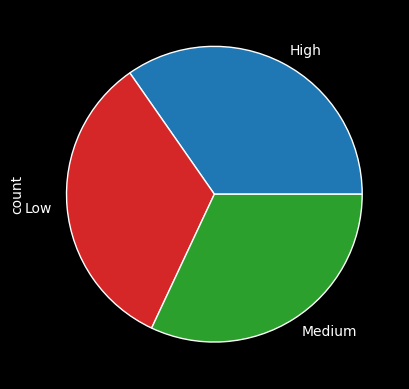

In [12]:
plot=df["Risk Level"].value_counts().plot(kind='pie',colors=['tab:blue','tab:red','tab:green'])
df["Risk Level"].value_counts()

# Obersvation:
1. The spread of risk factor is very even

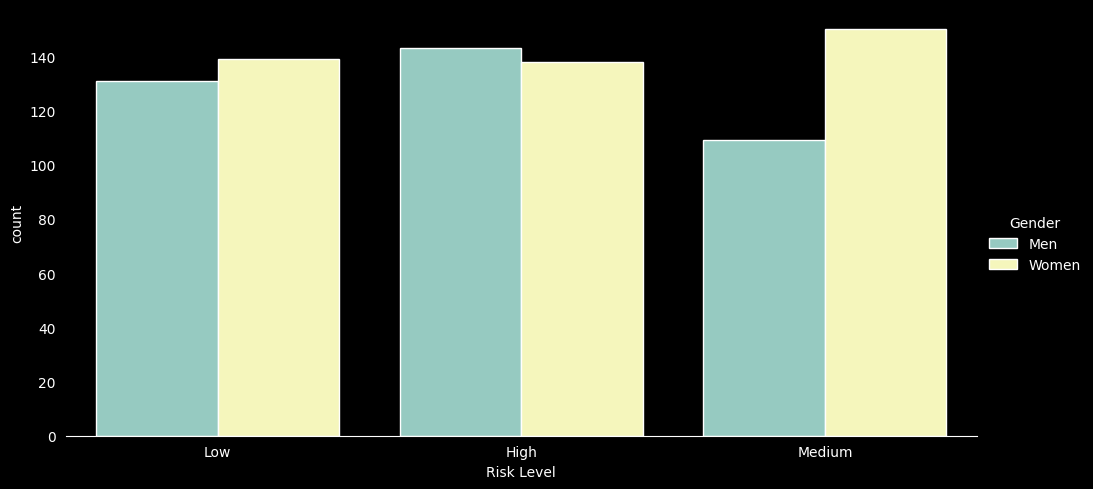

In [13]:
g = sns.catplot(
    data=df, kind="count",
    x="Risk Level",hue="Gender", errorbar=None, aspect=2
)
g.despine(left=True)

#sns.histplot(df[df["Gender"]=="Men"]["Risk Level"], label="Men", legend=True)

#sns.histplot(df[df["Gender"]=="Women"]["Risk Level"], label="Women", legend=True)

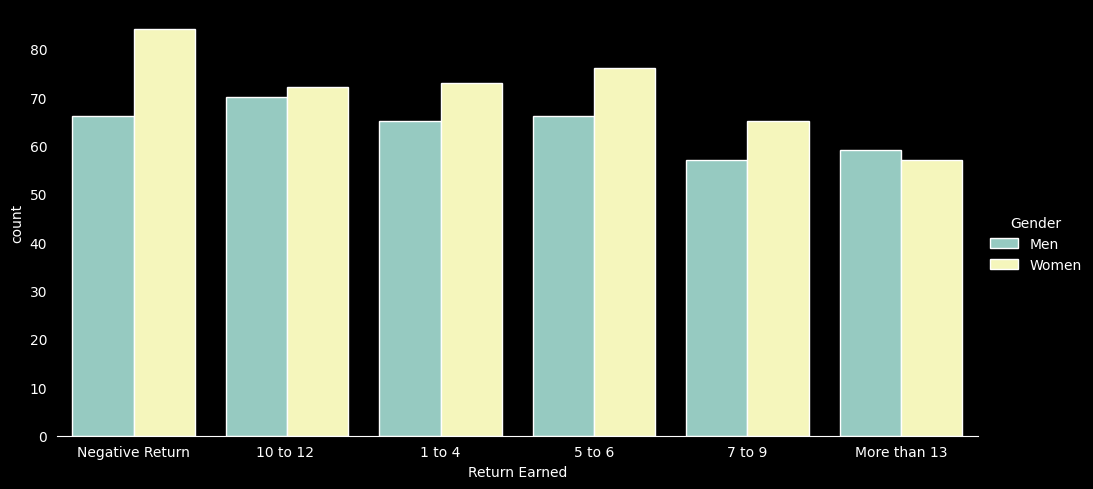

In [14]:
g = sns.catplot(
    data=df, kind="count",
    x="Return Earned",hue="Gender", aspect=2
)
g.despine(left=True)

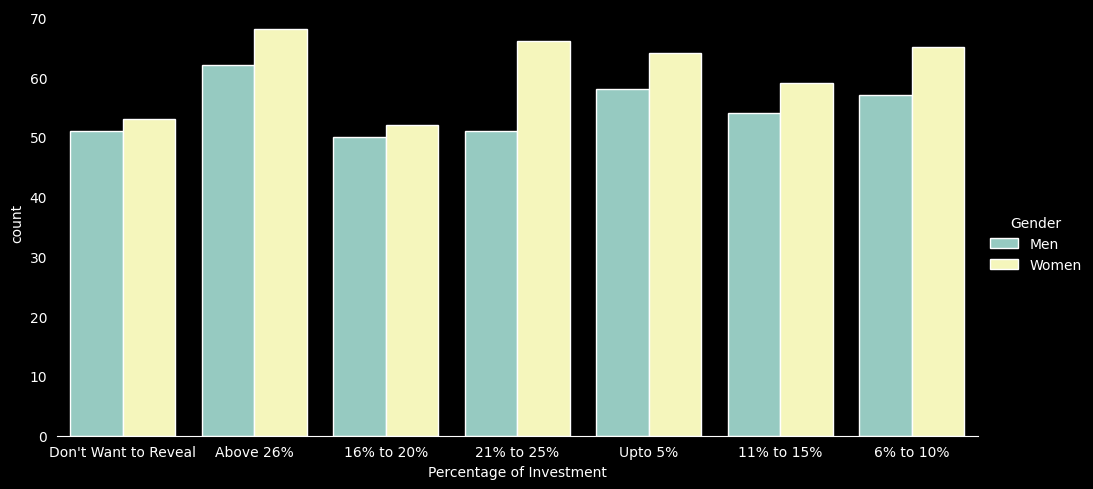

In [15]:
g = sns.catplot(
    data=df, kind="count",
    x="Percentage of Investment",hue="Gender", errorbar=None, aspect=2
)
g.despine(left=True)

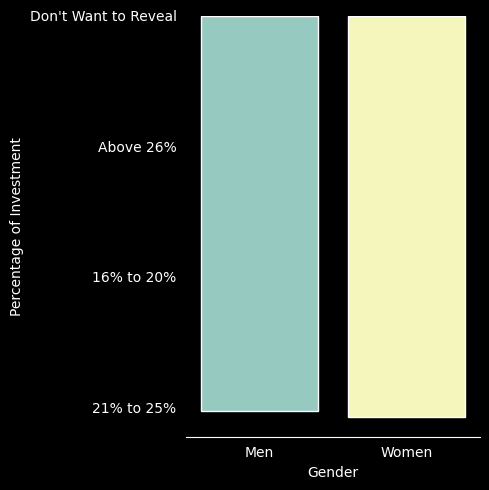

In [16]:
g = sns.catplot(
    data=df, kind="bar",
    x="Gender",y="Percentage of Investment",hue="Gender", errorbar=None
)
g.despine(left=True)

# Obersvation
1. Women tend to make investments with average risk
2. Women make a lower ROI
3. Women tend to invest more
4. Men are more likely to have postive returns

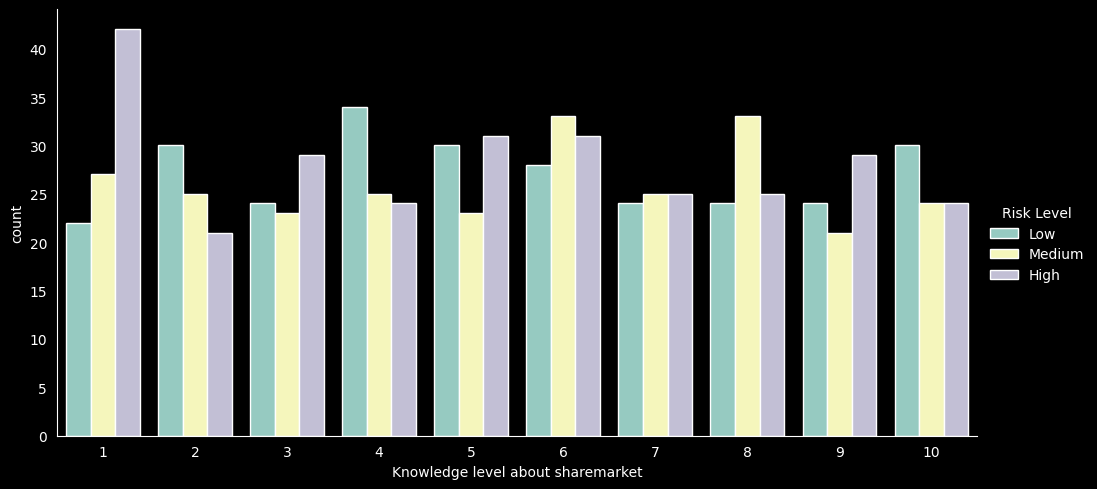

In [17]:
g = sns.catplot(
    data=df,kind="count",
    x="Knowledge level about sharemarket", hue="Risk Level", errorbar=None,aspect=2
)

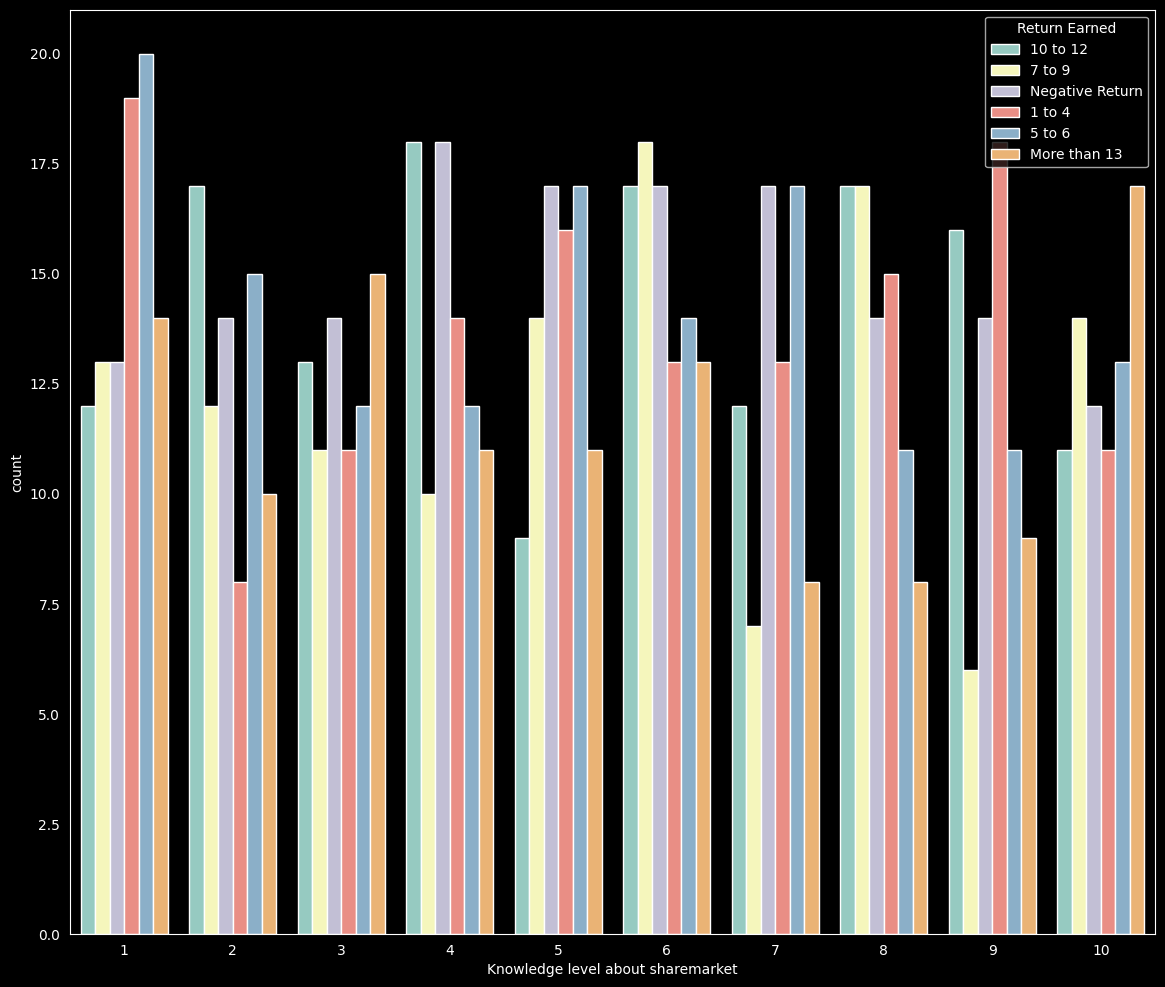

In [18]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,12
g = sns.countplot(
    data=df,
    x="Knowledge level about sharemarket",hue="Return Earned", legend=True
)

# Observations
1. There is no discernable difference in the investments and returns made by people with different knowledge about the sharemarket

<Axes: xlabel='Age', ylabel='count'>

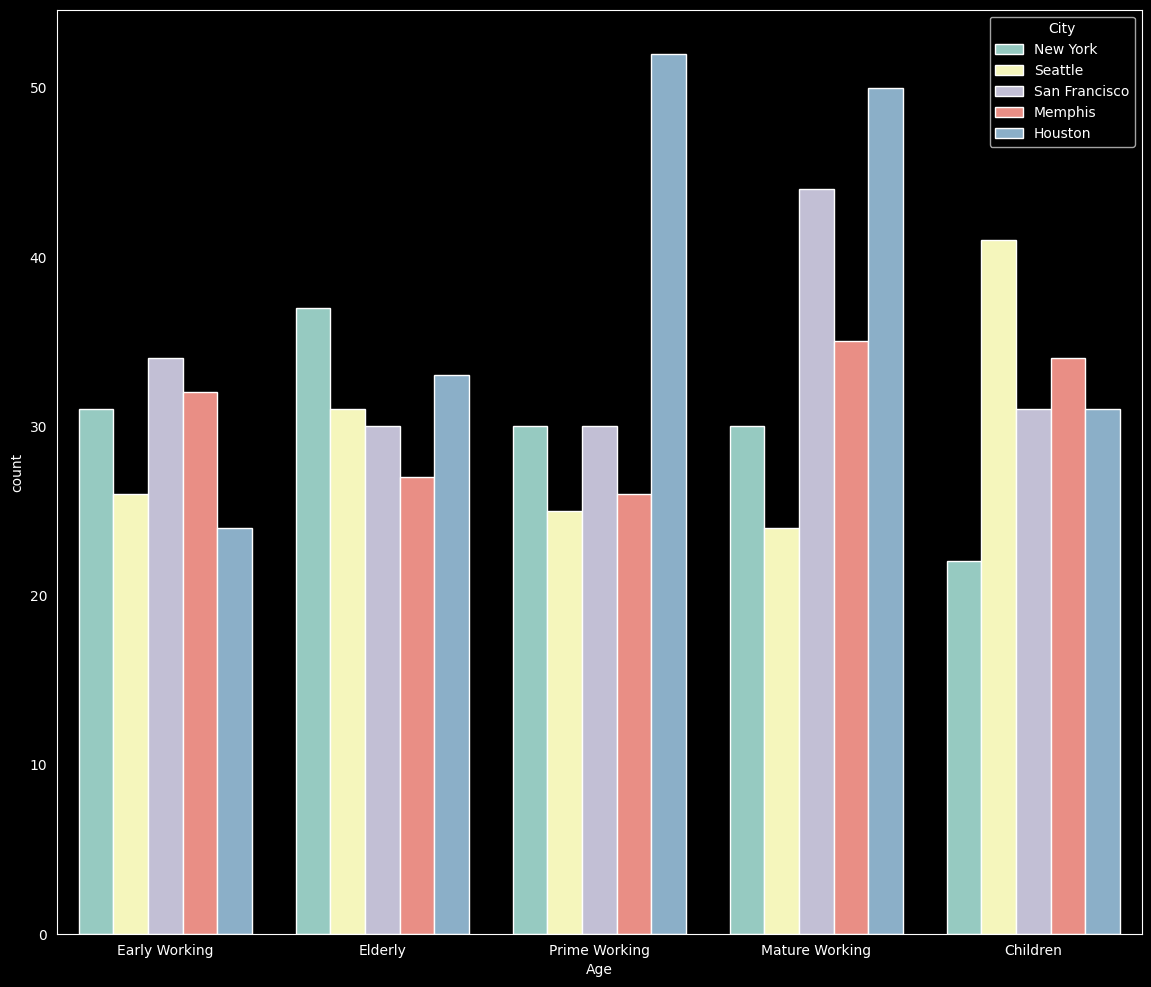

In [19]:
sns.countplot(data=df, x="Age", hue="City")

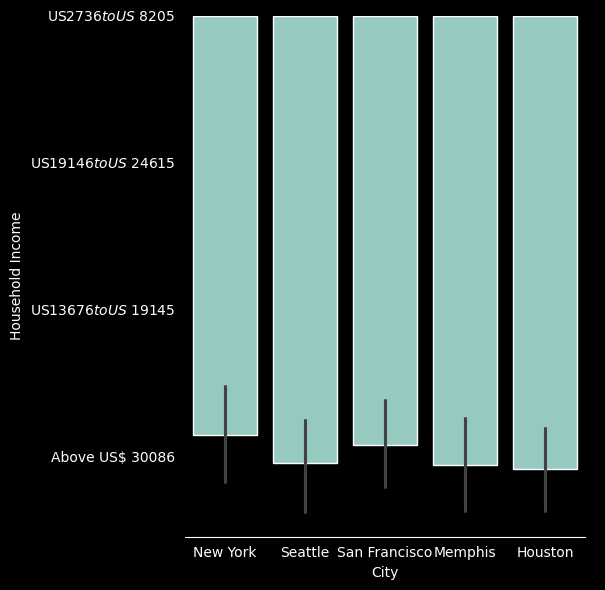

In [20]:

g=sns.catplot( kind="bar", data=df, x="City", y="Household Income",width=1,gap=0.2,height=6)
g.despine(left=True)

# Obersvation
1. People in their prime stay in Seattle, which aligns with general sentiment as Seattle is the city full of giant corporations.
2. Houston pays the most

In [21]:
# Data preprocessing

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d = defaultdict(LabelEncoder)

def encoded(df,d):
    return df.apply(lambda x: d[x.name].fit_transform(x))
def decoded(df,d):
    return df.apply(lambda x: d[x.name].inverse_transform(x))


# Preprocess

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
x = encoded(df,d).drop("Risk Level", axis=1).drop("Return Earned", axis=1)
x=pca.fit_transform(x)

x_train=x[:600,:]
x_test =x[600:,:]

#x_train_norm = (x_train - x_train.mean()) / x_train.std()
#x_test_norm = (x_test - x_test.mean()) / x_test.std()
y_re_train = encoded(df,d)["Return Earned"][:600]
y_re_test = encoded(df,d)["Return Earned"][600:]

y_rl_train = encoded(df,d)["Risk Level"][:600]
y_rl_test = encoded(df,d)["Risk Level"][600:]

In [23]:
x_train.shape, y_rl_train.shape, y_re_train.shape

((600, 12), (600,), (600,))

# We are going train 2 models, 1 for risk level and 1 for return earned

In [24]:
!pip install -qU xgboost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error


rl = XGBClassifier(n_estimators=550, eval_metric='rmse')
re = XGBClassifier(n_estimators=550, eval_metric='rmse')

rl.fit(x_train, y_rl_train)
re.fit(x_train, y_re_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=550, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
rl_preds=rl.predict(x_test)
re_preds=re.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, f1_score, r2_score

re_acc=accuracy_score(y_re_test, re_preds)
rl_acc=accuracy_score(rl_preds, y_rl_test)

In [27]:
re_acc,rl_acc

(0.17142857142857143, 0.35714285714285715)

# Using these models we can make decisions as to what investment we should make